In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.gen_control_flow_ops import next_iteration


In [9]:
# some sample data generating
X=2*np.random.rand(100,1)
y=5+2*X+np.random.randn(100,1)
"""
performing gradient descent for the linear regression model
"""

def gradient_descent(X,y,learning_rate,n_iterations):
    X_b=np.c_[np.ones((100,1)),X]
    n_samples=len(X_b)
    theta=np.random.rand(2,1)

    cost_history=[]
    for i in range(n_iterations):
        predictions=X_b.dot(theta)
        error=predictions-y

            # For b (theta_0): (2/n_samples) * sum(error)
        # For m (theta_1): (2/n_samples) * sum(error * X)
        gradient=2/n_samples*X_b.T.dot(error)

        theta=theta-learning_rate*gradient
        cost=np.mean(error**2)
        cost_history.append(cost)

    b=theta[0][0]
    m=theta[1][0]

    return m,b,cost_history

learning_rate=0.05
n_iterations=1000

m_final,b_final,cost_history=gradient_descent(X,y,learning_rate,n_iterations)
print("--- Gradient Descent Results ---")
print(f"Final slope (m): {m_final:.4f}")
print(f"Final intercept (b): {b_final:.4f}")
print(f"Final Cost/MSE: {cost_history[-1]:.4f}")




--- Gradient Descent Results ---
Final slope (m): 1.6442
Final intercept (b): 5.4712
Final Cost/MSE: 0.8292


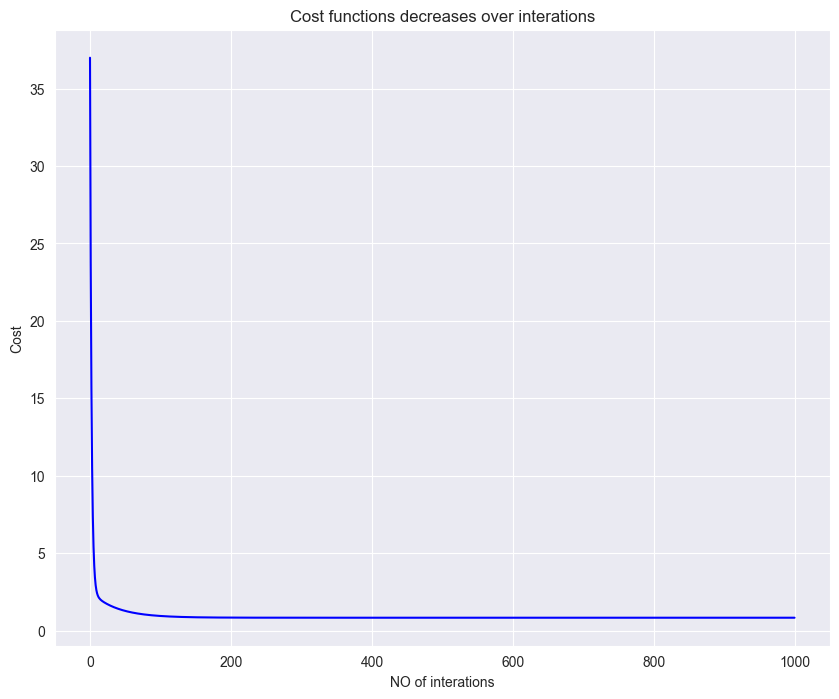

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(n_iterations),cost_history,'b-')
plt.title('Cost functions decreases over interations')
plt.xlabel('NO of interations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

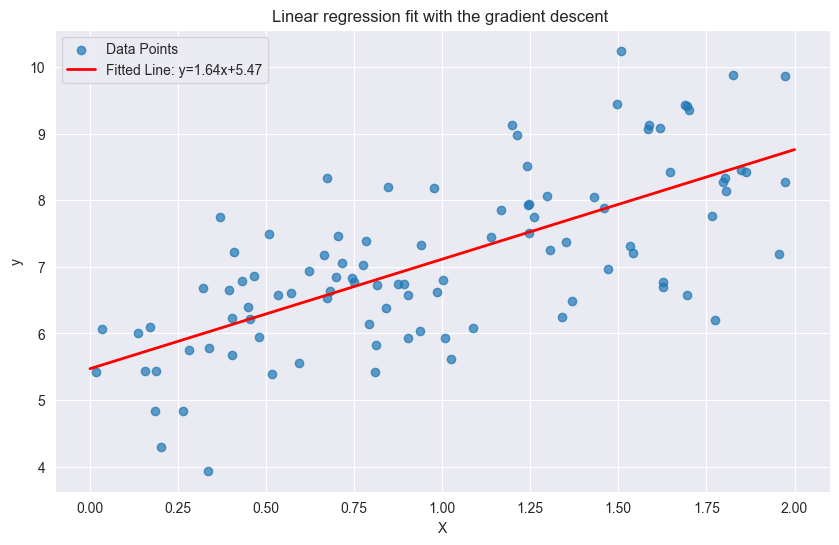

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data Points')
# Create a line of x values to plot the regression line
x_line = np.array([0, 2])
# Calculate the corresponding y values using our final m and b
y_line = m_final * x_line + b_final
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fitted Line: y={m_final:.2f}x+{b_final:.2f}')
plt.title('Linear regression fit with the gradient descent ')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Now we will dive deep into the three type of gradient descent where first is :-batch gradient descent

X = 2 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
X_b

array([[1.        , 1.01541416],
       [1.        , 0.54037833],
       [1.        , 0.53651637],
       [1.        , 1.06596285],
       [1.        , 1.67017294],
       [1.        , 0.56336533],
       [1.        , 0.32438951],
       [1.        , 1.12390309],
       [1.        , 0.14845672],
       [1.        , 1.92251954],
       [1.        , 1.60527985],
       [1.        , 1.21880727],
       [1.        , 1.7069418 ],
       [1.        , 1.20845696],
       [1.        , 1.22488406],
       [1.        , 1.70642489],
       [1.        , 1.09135038],
       [1.        , 0.20504563],
       [1.        , 0.50165778],
       [1.        , 1.79991762],
       [1.        , 1.55455368],
       [1.        , 0.01848912],
       [1.        , 1.36877375],
       [1.        , 0.40843025],
       [1.        , 1.09875076],
       [1.        , 1.17952287],
       [1.        , 0.3781225 ],
       [1.        , 0.9225915 ],
       [1.        , 0.06322051],
       [1.        , 1.3769231 ],
       [1.

Batch GD ----> m: 2.1547, b: 4.9263


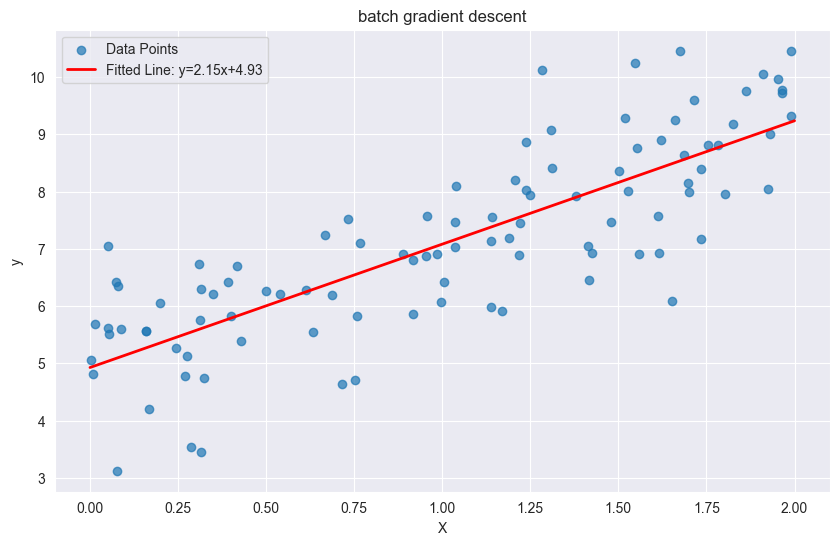

In [28]:

X = 2 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
def batch_gradient_descent(X_b, y, learning_rate, n_iterations):
    n_samples = len(X_b)
    # theta[0] will be the bias/intercept (b), theta[1] will be the slope (m)
    theta = np.random.randn(2, 1)
    for i in range(n_iterations):
        # Calculate predictions and error for the ENTIRE dataset
        predictions = X_b.dot(theta)
        error = predictions - y
        # Calculate gradients using the ENTIRE dataset
        gradients = 2/n_samples * X_b.T.dot(error)
        theta = theta - learning_rate * gradients
    return theta[1][0], theta[0][0]


learning_rate = 0.05
n_iterations = 1000
m_batch, b_batch = batch_gradient_descent(X_b, y, learning_rate, n_iterations)

print(f"Batch GD ----> m: {m_batch:.4f}, b: {b_batch:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data Points')
x_line = np.array([0, 2])

y_line = m_batch * x_line + b_batch
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fitted Line: y={m_batch:.2f}x+{b_batch:.2f}')
plt.title('batch gradient descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# 2. the second gradient descent is stochastic gradient descent
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) #
X_b = np.c_[np.ones((100, 1)), X]

X_b

array([[1.00000000e+00, 1.37473637e+00],
       [1.00000000e+00, 2.51709252e-01],
       [1.00000000e+00, 7.84324902e-01],
       [1.00000000e+00, 1.80415942e+00],
       [1.00000000e+00, 1.67879945e+00],
       [1.00000000e+00, 1.33024736e+00],
       [1.00000000e+00, 1.68010775e+00],
       [1.00000000e+00, 1.46112847e+00],
       [1.00000000e+00, 1.36379187e+00],
       [1.00000000e+00, 1.45695554e+00],
       [1.00000000e+00, 1.72735753e+00],
       [1.00000000e+00, 1.34097781e+00],
       [1.00000000e+00, 1.12671687e+00],
       [1.00000000e+00, 1.86520164e+00],
       [1.00000000e+00, 1.94163060e-01],
       [1.00000000e+00, 1.85901834e-01],
       [1.00000000e+00, 1.28553514e+00],
       [1.00000000e+00, 1.74360394e+00],
       [1.00000000e+00, 1.05097484e+00],
       [1.00000000e+00, 5.82135821e-01],
       [1.00000000e+00, 8.16857859e-01],
       [1.00000000e+00, 1.43067503e+00],
       [1.00000000e+00, 1.65805124e+00],
       [1.00000000e+00, 1.97762371e+00],
       [1.000000

Stochastic GD :- 
Slope (m): 3.1415, 
Intercept (b): 3.8483


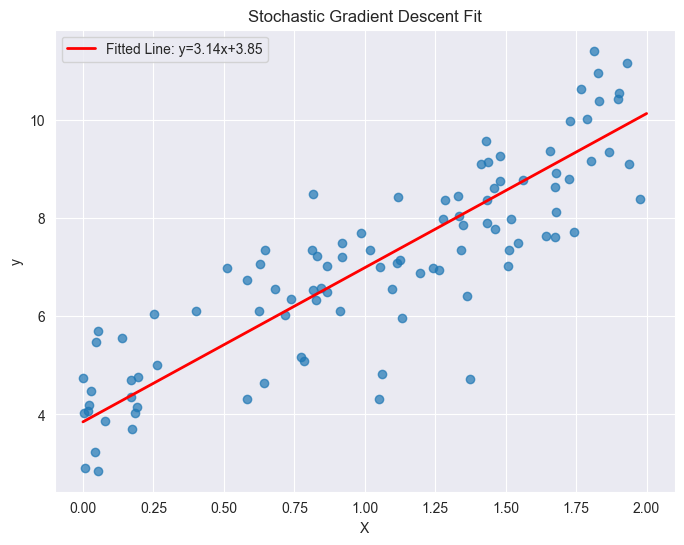

In [42]:
def stochastic_gradient_descent(X, y, learning_rate, n_epochs):
    n_samples=len(X_b)
    theta=np.random.randn(2,1)

    for epoch in range(n_epochs):
        for i in range(n_samples):
            random_index=np.random.randint(n_samples)
            xi=X_b[random_index:random_index+1]
            yi=y[random_index:random_index+1]

            error=xi.dot(theta)-yi
            gradient=2 * xi.T.dot(error)
            theta=theta-learning_rate * gradient

    return theta[1][0], theta[0][0]

learning_rate = 0.05
n_epochs = 50
m_final,b_final=stochastic_gradient_descent(X_b,y,learning_rate, n_epochs)

print(f"Stochastic GD :- \nSlope (m): {m_final:.4f}, \nIntercept (b): {b_final:.4f}")
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
x_line = np.array([0, 2])
y_line = m_final * x_line + b_final
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fitted Line: y={m_final:.2f}x+{b_final:.2f}')
plt.title('Stochastic Gradient Descent Fit')
plt.xlabel('X'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.show()


Mini-Batch GD :- 
Slope (m): 3.0930, 
Intercept (b): 3.9225


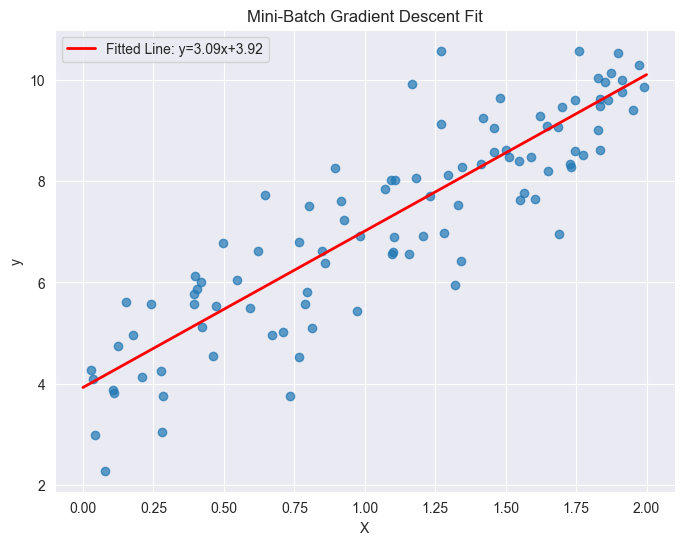

In [48]:
# 3. third type is mini_batch_gradient_descent
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

def minibatch_gradient_descent(X_b,y,learning_rate, n_epochs,batch_size):
    n_samples=len(X_b)
    theta=np.random.randn(2,1)

    for epoch in range(n_epochs):
        shuffled_indices=np.random.permutation(n_samples)
        X_b_shuffled=X_b[shuffled_indices]
        y_shuffled=y[shuffled_indices]

        for i in range(0,n_samples,batch_size):
            xi=X_b_shuffled[i:i+batch_size]
            yi=y_shuffled[i:i+batch_size]
            error=xi.dot(theta)-yi
            gradient=2/batch_size * xi.T.dot(error)
            theta=theta-learning_rate * gradient
    return theta[1][0], theta[0][0]

learning_rate = 0.1
n_epochs = 50
batch_size = 16
m_final, b_final = minibatch_gradient_descent(X_b, y, learning_rate, n_epochs, batch_size)

print(f"Mini-Batch GD :- \nSlope (m): {m_final:.4f}, \nIntercept (b): {b_final:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
x_line = np.array([0, 2])
y_line = m_final * x_line + b_final
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fitted Line: y={m_final:.2f}x+{b_final:.2f}')
plt.title('Mini-Batch Gradient Descent Fit')
plt.xlabel('X'); plt.ylabel('y'); plt.legend(); plt.grid(True)
plt.show()

In [109]:
# This is for the logistic regression

X = np.array([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [1.75], [2.00],
              [2.25], [2.50], [2.75], [3.00], [3.25], [3.50], [4.00], [4.25],
              [4.50], [4.75], [5.00], [5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, learning_rate=0.1, n_iterations=2000):
    X_b = np.c_[np.ones((len(X), 1)), X]
    m_samples = len(X_b)

    theta = np.random.randn(2, 1)

    print("\n--- Running Logistic Regression GD ---")
    for i in range(n_iterations):
        z = X_b.dot(theta)
        hypothesis = sigmoid(z)
        error = hypothesis - y
        gradients = (1/m_samples) * X_b.T.dot(error)
        theta = theta - learning_rate * gradients
    return theta

final_theta_logistic = gradient_descent_logistic(X, y)

print("\n--- Results ---")
print(f"Intercept (theta_0): {final_theta_logistic[0][0]:}")
print(f"Coefficient (theta_1): {final_theta_logistic[1][0]:}")

new_x = np.array([[3]])
new_x_b = np.c_[np.ones((1, 1)), new_x]
prediction_prob = sigmoid(new_x_b.dot(final_theta_logistic))
print(f"\nPrediction for x=3: Probability = {prediction_prob[0][0]:.4f}")


--- Running Logistic Regression GD ---

--- Results ---
Intercept (theta_0): -3.961654333890747
Coefficient (theta_1): 1.4654012699234675

Prediction for x=3: Probability = 0.6070


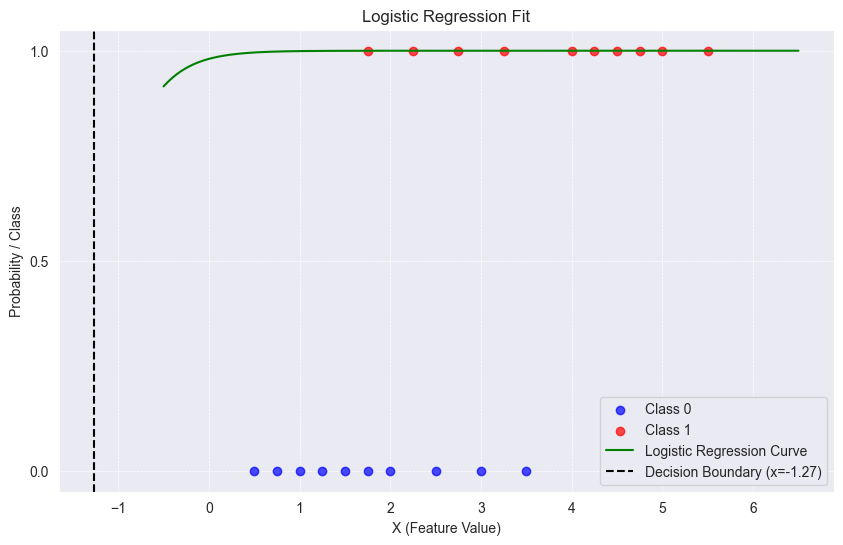

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0], y[y == 0], color="blue", alpha=0.7, label="Class 0")
plt.scatter(X[y == 1], y[y == 1], color="red", alpha=0.7, label="Class 1")


x_line = np.linspace(X.min() - 1, X.max() + 1, 300)

y_line = sigmoid(b_final + m_final * x_line)

plt.plot(x_line, y_line, 'g-', label="Logistic Regression Curve")

# Calculate and plot the decision boundary (where probability is 0.5)
# This occurs where b + m*x = 0  =>  x = -b / m
decision_boundary = -b_final / m_final
plt.axvline(x=decision_boundary, color='black', linestyle='--', label=f'Decision Boundary (x={decision_boundary:.2f})')

# Final plot settings
plt.title('Logistic Regression Fit')
plt.xlabel('X (Feature Value)')
plt.ylabel('Probability / Class')
plt.yticks([0, 0.5, 1.0])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()